this is the first attempt over making gda, a generative learning algorithm

first we will import the necessary libraries

In [154]:
import sklearn.preprocessing as pre
import sklearn.model_selection as ms
from sklearn.metrics import accuracy_score 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

now we will read the data using the pandas library

In [155]:
df=pd.read_csv("d_gda_data2.csv")
labelcoder= pre.LabelEncoder()
df['z']=labelcoder.fit_transform(df['z'])
# print(type(df[['x']]))
df.head()

,x,y,z
0,265.628960,463.636074,0
1,247.068632,420.717148,0
2,258.066663,442.482035,0
3,232.503269,440.620269,0
4,231.998427,455.473217,0


now we convert the dataset into the desired format

In [168]:
x,x_test,y,y_test=ms.train_test_split(np.array(df[['x','y']]),np.array(df['z']),test_size=0.2,random_state=50)
print(len(x))

364


we will plot our data to get a feel of what all preprocessing is needed in the data

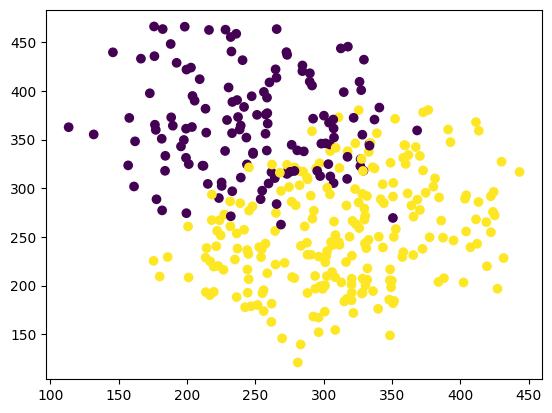

In [169]:
temp=x.T
plt.scatter(temp[0],temp[1],c=y)
plt.show()

now we will apply some preprocessing for reducing the errors in the final answer

In [158]:
scaler=pre.StandardScaler()
scaler.fit(x)
x=scaler.transform(x)
scaler.fit(x_test)
x_test= scaler.transform(x_test)

here we do not require the quantile transformer as there are not any visible outliers and also it rather yields in less accuracy because of decrase in the difference between the two classes 

In [159]:
# qt= pre.QuantileTransformer()
# x=qt.fit_transform(x)
# x_test= qt.fit_transform(x_test)
# # print(x)

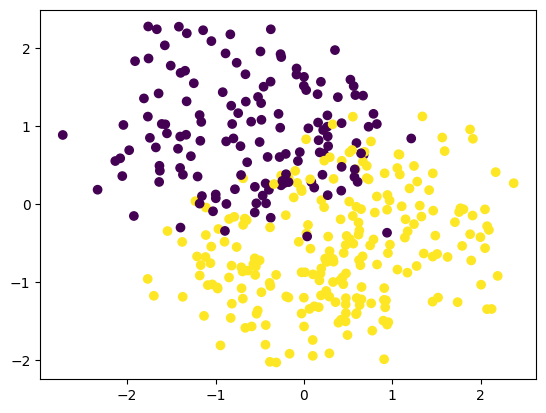

In [160]:
temp=x.T
plt.scatter(temp[0],temp[1],c=y)
plt.show()

now we will calculate the class priors and the mean of each class and the covarience matrix for the dataset

In [161]:
def mean(x):
    sm0,sm1=0,0
    for i in range(len(y)):
        if y[i]==0:
            sm0+=x[i]
        else:
            sm1+=x[i]
    mn= np.array([sm0,sm1])
    mn/= len(y)
    return mn

def prior1(y):
    p0=0
    for i in range(len(y)):
        if y[i]==1:
            p0+=1
    return p0/len(y)

In [162]:
def cova(x):
    return np.cov(x,rowvar=False)

So now we will define the formula for the gaussian distribution

In [163]:
def gau(x,mu,cova):
    # invcova= np.linalg.inv(cova)
    invcova= cova
    det= np.linalg.det(invcova)
    gau= 1/(2*np.pi*np.sqrt(det))
    gau*=np.exp(-0.5*np.dot(np.dot((x-mu),invcova),(x-mu).T))
    return gau
    

now we will apply those function for calculation and training and then testing .

In [164]:
# TRAINING ON THE DATASET
mu=mean(x)
mu0=mu[0]
mu1=mu[1]
phi=prior1(y)
sigma=cova(x)
print(mu)
print(sigma)
print(phi)

[[-0.23090119  0.35035663]
 [ 0.23090119 -0.35035663]]
[[ 1.00275482 -0.25456443]
 [-0.25456443  1.00275482]]
0.6153846153846154


now we define a final function to apply the above parameters and find the classification for new values of x

In [165]:
def main(x):
    p0= gau(x,mu0,sigma)*(1-phi)
    p1= gau(x,mu1,sigma)*phi
    if p0>p1:
        return 0
    else:
        return 1

In [166]:
# TESTING ON THE DATASET
y_pred=[]
for i in x_test:
    y_pred.append(main(i))
print(y_pred)

[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1]


now we will plot the results with the test set

In [167]:
accuracy= 100*accuracy_score(y_test,y_pred,normalize= True)
print(accuracy)

89.01098901098901
